# 第6章 正確な数学的分析による二項確率の推論

In [2]:
%%html
<!--
<link rel="stylesheet" type="text/css" href="custom.css">
-->

- 本章では、近似値を一切使わずに純粋な解析を用いてベイズ推論を行う方法を紹介する。2つの理由で重要。
 1. 数学は比較的単純だが、
   - 連続パラメータに対するベイズ推論の基本的な概念を明示している
   - 何が近似しているのかについて明確な感覚を与える
 2. 紹介されるベータ分布は後の章でも繰り返し用いられる
- ただ6.5に記載はあるが、現実にはこのアプローチを用いることは難しい。そのためMCMC法を用いることになる。（7章以降）

## コイン投げ
* 本章でもコイン投げの例を用いる
- 表 or 裏
 - 名義的 => 2つの値は、順序や計量的な関係を持たない
 - 相互排他的 => 表か裏のどちらかで、両方とかどちらでも無いとかはない
 * 観測されたデータはそれぞれ独立していると仮定
 - 確率が時間を通じて変動しないと仮定

* いらない
- 裏が y=0 とか、表が y=1 とかは都合がいいように決めているだけです
  - 2つの名義的な値(裏、表)があるので以下のように呼ばれます：
    - 2値の
    - 2段階で名義的な
    - 二項
- y=0,y=1は、数字で表しているけれど、名義尺度 (多分)
 - 表が偉くて、裏が残念てことはない、
 - 「表や裏は単にカテゴリであり計量属性ではない」(p112)
   - Rでのファクタ型 !? 
 <img width="50%" src="http://bellcurve.jp/statistics/wp-body/wp-content/uploads/2016/03/fbd9782912af332ea3065d7e5e86c498.png">

- コイン投げの応用
 - 薬品の成功率
 - 試験の正解率
 - 左利きと右利きである確率
 - バスケットボールのフリースローの成功率
 - 赤ん坊が女の子である確率
 - 心臓手術を受けた患者の一年間生存率

* ベイジアン分析の流れ
    1. コインの表の生じうる確率に関する確信度の事前分布の割り当て
    2. コイン投げの結果で構成されるいくつかのデータの観測
    3. ベイズの公式を用いて確信度の事後分布を推論する
        * ベイズの公式には尤度関数の指定が必要

## 6.1 尤度関数：ベルヌーイ分布
* この節ではベルヌーイ分布とベルヌーイ尤度関数、という2つのキーワードが出てくるので注意
* ベルヌーイ分布の式
$$
p(y|\theta) = \theta^y(1-\theta)^{(1-y)}
$$
- 1回の試行で
 - 表(y=1)が出る確率が、$\theta$
 - 裏(y=0)が出る確率が、$1-\theta$
* 例えば$\theta=0.25$なら、
 - 表(y=1)が出る確率が、$0.25$
 - 裏(y=0)が出る確率が、$0.75$
* ベルヌーイ分布では、$\theta$を固定し、その時の$y$の確率を考える

* ベルヌーイ尤度関数について考える
- ベイズ推論において、関数 $p(y|\theta)$ は通常、データ$y$が明確で固定されたもの、** $\theta$を不明確で変動するパラメータ**としてみなす
* コインを$N$回投げ、$i$回目のコイン投げの結果を$y_i$、1組の結果を$\{y_i\}$とすると、その式は、（6.2,p129を変更）
 $$
 \begin{align}
 p(y_1y_2\dots y_N|\theta) 
 &=p(y_1|\theta)p(y_2|\theta)\dots p(y_N|\theta) \\
 &=\theta^{y_1}(1-\theta)^{(1-y_1)}\theta^{y_2}(1-\theta)^{(1-y_2)} \dots \theta^{y_N}(1-\theta)^{(1-y_N)} \\
 &=\theta^{y_1+y_2+ \dots+ y_N}(1-\theta)^{(N-y_1-y_2- \dots -y_N)} \\
 &=\theta^{z}(1-\theta)^{(N-z)}
 \end{align}
 $$
* 上の$z$はコインの表の数
* 例えば、コインを2回投げ、$\{y_i\}=\{1,0\}$だったとすると
 $$
 \begin{align}
 p(\{1\}|\theta) 
 &=\theta^{1}(1-\theta)^{(2-1)} \\
 &=\theta(1-\theta)
 \end{align}
 $$
* $p(\{1,0\}|\theta)$が最大の値となるのは、$\theta=0.5$のとき。
* ベルヌーイ分布の時は$\theta$を先に固定して$y$を考えていたのに対し、ベルヌーイ尤度関数は$y_i$を先に固定して、$\theta$を考えている

## 6.2. 確信度の記述：ベータ分布
* パラメータ値の事後分布の確信度を求める。
    * [0,1]の区間でのパラメータ$\theta$のそれぞれの値に関する事前確率を説明する数式が必要。
* 本質的には[0,1]の区間の確率密度関数であれば用いることができるが、次の性質があると便利。
    1. ベイズの公式の分子である$p(y|\theta)$と$p(\theta)$の積が$p(\theta)$と同じ形の関数であること
        * 事前確率と事後確率が同じ形の関数で記述され、その後にさらなるデータを入れて次の事後分布の形を導出しても、常に同じ形の関数になる。
    2. ベイズの公式における分布、$\int d\theta p(y|\theta) p(\theta)$を解析的に解けるような形であること
* 事後分布が事前分布と同じ形になるように$p(y|\theta)$と$p(\theta)$が結合すると、$p(\theta)$は$p(y|\theta)$の共役事前分布と呼ばれる

* 事前の信念を表すために、$\theta ^ a (1-\theta) ^ b$を含む確率密度関数を求める。
    * この形式で表せると、コインを一度投げたベルヌーイ尤度$\theta^y (1-\theta)^{1-y}$をかければ$\theta^{(y+a)} (1-\theta)^{(1-y+b)}$となり、同じ形の関数を得ることができる。
* この形の確率密度はベータ分布と呼ばれる。

$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$

+ $B(a,b)$ : ベータ密度関数の範囲を積分して$1.0$にするための正規化定数
    * $a$と$b$で一意に決まる値

$$
B(a,b) = \int^{1}_{0} \theta^{a-1} (1-\theta)^{b-1} \mathrm{d}\theta \tag{6.4,p130}
$$

* ベータ分布の例
    * $a$が大きくなれば右に移動、$b$が大きくなれば左に移動
    * $a$と$b$が共に大きくなると尖っていく
    * $a$と$b$は形状バラメータ
<img src="./img/fig6_1.png">

### 6.2.1. ベータ事前分布の指定
+ $\theta$に関する事前分布の信念を記述するベータ分布を指定する
* 事前分布の$a$と$b$は事前に観測されたデータとして、合計$n=a+b$回のコイン投げで表が$a$回、裏が$b$回出たものと考えられる。
+ 事前知識の程度によって、$a$と$b$を調整する。
    + コインに表裏があるという以上の事前知識がない場合
        + 表が1回と裏が1回事前に観測された（$a=1,b=1$)ことと同じ。この時ベータ分布は一様分布。
    * コインがおそらく公平だが、確信が持てない場合
        * 事前に観測されたデータを$a=4,b=4$というように想定することができる。
            * $\theta=0.5$で最大となるが、他の値にもほどほどになりうる

* ここでの目標：事前信念を、中心傾向とサンプルサイズの観点で表し、それをベータ分布における$a$と$b$の値に変換すること
* 例
    * ある母集団において左利きの確率
        + 中心傾向：経験から、およそ10%程度。
        + サンプルサイズ：自信がなければ、サンプルサイズが小さく$n=10$ぐらいと考える。
    * 政府が発行したコインが表になる確率
        + 中心傾向：50％
        + サンプルサイズ：ほぼ信じているのなら、$n=200$。事前に観測された200回のコイン投げのうち、100回が表だった。

+ ベータ分布における中心傾向と広がりがどのようになるかを知る
- ベータ分布は
$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$
- 平均値は
$$
\mu = \frac{a}{a+b}
$$
- 最頻値は
$$
\omega = \frac{a-1}{a+b-2}
$$
    * $a=b$であれば、平均値、最頻値は$0.5$
- 集中度:ベータ分布の広がり
$$
\kappa = a + b
$$
* 集中度が大きくなるにつれて、ベータ分布は狭く、あるいはより集中する。
    * 図6.1の対角線上を確認

* 前述の式を元にすると、平均値$\mu$、最頻値$\omega$、集中度$\kappa$を元に$a,b$を求めることができる。

$$a = \mu \kappa  かつ b = (1-\mu)\kappa \tag{6.5,p132}$$
$$a = \omega ( \kappa - 2 ) + 1 かつ b=(1 - \omega)(\kappa-2) + 1 ただし \kappa > 2 \tag{6.6,p132}$$
    
* 事前分布として選ぶ値$\kappa$は事前にコイン投げしたとみなす回数。
    * $\mu$に関する事前の信念を揺らがせるために必要なコイン投げ回数が数回で良いなら、事前の信念は小さな$\kappa$で表される
    + 多くのコイン投げが必要なら、事前の信念は大きな$\kappa$で表す。
+ 例
    + コインが公平であると考えている（$\mu=0.5$)が、あまりそうだと確信していないため、それまで8回投げたと想像していると仮定する（$\kappa=8$)
    + そのとき、上の式より、$a=b=4$。$\theta=0.5$で最大値となる。

* 最頻値を元にして、形状パラメータを定めることもできる
    + 最頻値は平均値よりも直感的に理解できる。（最頻値は分布において最も高い値に到達する点のため、視覚的に理解するのが容易だから。）
+ 平均値と標準偏差$\sigma$を用いることでも可能。
+ 式6.6を用いることが多いが、「$a<1$あるいは$b<1$もしくはその両方」あるいは「$\kappa>2$であると確信できないとき」には式6.5を用いる

## 6.3. 事後分布としてのベータ分布
* ここまで、ベルヌーイ尤度関数に便利な事前分布（共役事前分布）を設定した。
+ ベイズの公式を適用する際の事後分布がどうなるのか見ていく。
+ N回コインを投げ、z回表が出たデータセットがあると仮定する。ベイズの公式に、ベルヌーイ尤度とベータ事前分布を代入すると下記。
- ベルヌイ尤度
$$
\begin{align}
 p(N,z|\theta) &= \theta^z(1-\theta)^{(N-z)}
\end{align}
$$
- ベータ事前分布
$$
\begin{align}
 p(\theta)   &= \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)}
\end{align}
$$
- ベータ事後分布
$$
\begin{align}
p(\theta|z,N) &= \frac{p(z,N|\theta)p(\theta)}{p(z,N)} \\
&= \theta^z(1-\theta)^{(N-z)}\frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)}/p(z,N) \\
&= \frac {\theta^z(1-\theta)^{(N-z)}\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)p(z,N)} \\
&= \frac {\theta^{(z+a-1)}(1-\theta)^{(N+b-z-1)}}{B(a,b)p(z,N)} \\
&= \frac {\theta^{(z+a-1)}(1-\theta)^{(N+b-z-1)}}{B(z+a,N-z+b)} \tag{Normalization}\\
&= beta(z+a, N-z+b)
\end{align}
$$
+ 最初の事前分布がベータ分布であれば、その更新後の事後分布も常にベータ分布

### 6.3.1. 事後分布は事前分布と尤度を折衷したものである
+ 事前確率はコインを$a+b$回投げ、$a$回表が出たとした。$N$回コインを投げて$z$回表が出た場合を考える。
- 事前平均
$$
\frac{a}{a+b}
$$
- 事後平均
$$
\frac{z+a}{N+a+b}
$$
- 事後平均は代数的には、以下の加重平均に書き換えられる
$$
\underbrace{ \frac{z+a}{N+a+b} }_\text{事後平均} = 
\underbrace{ \frac{z}{N} }_\text{データ}
\underbrace{ \frac{N}{N+a+b} }_\text{重み付け}+
\underbrace{ \frac{a}{a+b} }_\text{事前平均}
\underbrace{ \frac{a+b}{N+a+b} }_\text{重み付け}
$$
+ コインを投げた回数$N$が増えれば増えるほど、事前分布の影響が小さくなり、事後平均がデータの比率に近くなることがわかる。

## 6.4. 具体例
### 6.4.1. ベータ分布として表される事前知識
+ 20回中17回成功したような例を3つ見ていく。
+ 政府発行コインの例
+ 事前分布は、$\omega=0.5$,$\kappa=200$とする。(テキストとグラフの数値が一致してないので間違い？）
+ コインを20回投げて17回表が出たとする。
+ あまり変化しない。
<img src="./img/fig6_4_1.png">

+ バスケのフリースローの例
+ プロの選手は少なくとも50％、最高90％、最頻値75%の確率で成功させるという事前知識。$\kappa=25$と設定。($\kappa$の設定感覚はよくわからない)    
+ 20回中17回成功した選手がいたとする。その選手の能力を推定する。
* コインの例よりは事後分布は事前分布と変化する。
<img src="./img/fig6_4_2.png">

+ 遠い惑星のロボットが新しい物質の調査をしている例
+ 事前知識は2つの色青と緑が出現するということ
+ その2つの色の出現確率を推定する
+ ほぼ尤度関数と近くなる
<img src="./img/fig6_4_3.png">

+ 「20回中17回○○が観測された」場合であっても、事前分布によって事後分布は異なる。
+ 事前分布の$a$,$b$と尤度関数の$z$,$N$から事後分布の$a'$と$b'$が求められることがわかる。
<img src="./img/fig6_4.png">

### 6.4.2. ベータ分布として表せられない事前知識
+ 繰り返しとなるが、事前知識を表すベータ分布に用いた時の長所とは、事後分布が再び正確にベータ分布となり、それゆえにどれだけデータを加えても、事後分布の正確な表現や計算が常に行えること
+ しかし、ベータ分布で表現できる事前知識には限界がある。
+ 事前知識がベータ分布で表現できない場合には、事後分布を得るための別の方法を用いなければならない。
+ 変なコインの例
    + 2種類のコインを製造している会社。表が出やすい（75％）コイン、表が出にくい（25％）コイン。
    + 事前知識は$\theta=0.25$と$\theta=0.75$に頂点を持つ二峰分布となる。（ベータ分布で表せない）
    + そこで離散値のグリッドで事前知識を表現してみる。
        + この場合、事前知識の表現方法は数学的に一意でない。そのためこれを実現する手法はいくつかある。
+ 図6.5のようになる。（テキスト事前分布の縦軸の数値が間違えているか。積分しても1にならない）
+ 3つの隆起は事前分布の2つの頂点と尤度の真ん中の頂点の折衷したものになる。
<img src="./img/fig6_5.png">

# まとめ
+ 数値による近似ではなく、解析的に数学のみを用いて、ベイズの公式を解くことができる場合について試した。
    + 尤度が共役事前分布をもつことによって、事後分布と事前分布が同じ形の数式になるケースについて説明した。
+ただ現実には、
    + 単純な尤度関数のみが共役事前分布を持つ。現実問題に当てはめる複雑なモデル、尤度関数では、共役事前分布を持たない。
    + 共役事前分布があったとしても、その形で事前知識を表現できるとは限らない。
+ 現実にはマルコフ連鎖モンテカルロ法(MCMC)を用いることになる。

* いらない
## 6.3 事後分布としてのベータ分布

- N回中z回表が観察されたデータの集合があると仮定して、
- ベルヌイ尤度とベータ事前分布をベイズの公式に代入すると

 - ベータ事前分布
$$
\begin{align}
 p(\theta) &= beta(a, b)  
\end{align}
$$
 - ベータ事後分布
$$
\begin{align}
p(\theta|z,N) &= \frac{p(z,N|\theta)p(\theta)}{p(z,N)} \\
&= beta(z+a, N-z+b)
\end{align}
$$
<hr>
- 事前分布
 - 確信度(事前分布)として、以下の信念
   - 表が$a$ 回、
   - 裏が$b$ 回
- 事後分布
 - ベイズの公式から
   - 表が、$z+a$ 回
   - 裏が $N-z+b$ 回

## 6.3.1 事後分布は事前分布と尤度を折衷したものである

- 事前分布の平均
$$
\mathbb{E}[beta(a,b)] = \frac{a}{a+b}
$$
- 事後分布の平均
$$
\mathbb{E}[beta(z+a,N-z+b)] = \frac{z+a}{N+a+b}
$$
- 事後平均は代数的には、以下の重みづけの平均に書き換えられる
 - 事前分布 $\frac{a}{a+b}$ 
 - データの比率 $\frac{z}{N}$ 
$$
\underbrace{ \frac{z+a}{N+a+b} }_\text{事後平均} = 
\underbrace{ \frac{z}{N} }_\text{データ}
\underbrace{ \frac{N}{N+a+b} }_\text{重み付け}+
\underbrace{ \frac{a}{a+b} }_\text{事前平均}
\underbrace{ \frac{a+b}{N+a+b} }_\text{重み付け}
$$

* いらない

## 6.1 尤度関数：ベルヌイ分布
- 表で書くと
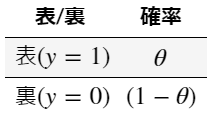
<br>

- Pythonで書くと

```python
def p(theta: float):
    import random
    if(random.random()<theta):
        return 1
    else:
        return 0
```

- これでは数学的に扱うのが難しいので
 - うまいこと1つの数式で書くと
$$
p(y|\theta) = \theta^y(1-\theta)^{(1-y)} \tag{6.1, p128}
$$

In [1]:
# いらない？
# ベルヌーイ分布
def p(theta: float) -> int:
    import random
    if(random.random()<theta):
        return 1
    else:
        return 0

N = 100 # 試行回数
theta = 0.4 # 表の確率
list = [p(theta) for i in range(N)]
print("100回の試行 = "  ,list )
print("合計 = ", sum(list) )

100回の試行 =  [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
合計 =  41


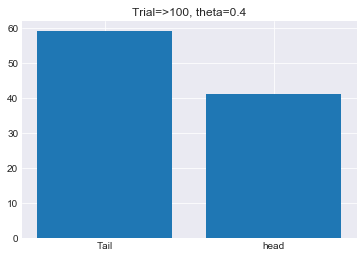

In [5]:
# いらない？

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

list = np.array(list)
plt.bar([0,1], [list[list==0].size, list[list==1].size], tick_label=["Tail","head"] )
plt.title("Trial=>{0}, theta={1}".format(N, theta))
plt.show()

* いらない？

## 6.1 尤度関数：ベルヌーイ分布
- ベルヌーイ分布の平均、分散
$$
\begin{align}
Ber(\theta) &= Bi(1,\theta) \\
\mathbb{E}[Bi(1,\theta)] &= \theta \\
\mathbb{V}[Bi(1,\theta)] &= \theta(1-\theta)
\end{align}
$$

## 6.1 尤度関数：ベルヌイ<span style="color:red">尤度関数</span>

- $N$回コイン投げをして、以下のように観測されたとする (そのうち表が$z$回)
 - 観察結果、$ y_1 y_2 \dots y_N,\space y_i  \in \{0,1\} $
 - 例、表,裏,裏,表,裏,表,… => $1,0,0,1,0,1,\dots$
<hr>
- それぞれの試行の確率は
 - $p(y_i|\theta)$
- それがN回繰り返されたときの確率は
 - $p(y_1y_2\dots y_N|\theta)$


## 6.1 尤度関数：ベルヌイ<span style="color:red">尤度関数</span>

- $N$回コイン投げをして、以下のように観測されたとする (そのうち表が$z$回)
 - 観察結果、$y_1 y_2 \dots y_N $
 - 例、表,裏,裏,表,裏,表,… => $1,0,0,1,0,1,\dots$
<hr>
- それぞれの試行は、独立で、同時確率なので
 $$
 \begin{align}
 p(y_1y_2\dots y_N|\theta) 
 &=p(y_1|\theta)p(y_2|\theta)\dots p(y_N|\theta) \\
 &=\theta^{y_1}(1-\theta)^{(1-y_1)}\theta^{y_2}(1-\theta)^{(1-y_2)} \dots \theta^{y_N}(1-\theta)^{(1-y_N)} \\
 &=\theta^{y_1+y_2+ \dots+ y_N}(1-\theta)^{(N-y_1-y_2- \dots -y_N)} \\
 &=\theta^{z}(1-\theta)^{(N-z)} \tag{6.2,p129}
 \end{align}
 $$

## 6.1 尤度関数：ベルヌイ<span style="color:red">尤度関数</span>

- $N$回コイン投げをして、以下のように観測されたとする (そのうち表が$z$回)
 - 観察結果、$y_1 y_2 \dots y_N $
- この確率は、上記の観察結果が得られる確率
 $$
 p(y_1y_2\dots y_N|\theta)  =\theta^{z}(1-\theta)^{(N-z)} \tag{6.2, p129}
 $$
<hr>
- p129 第2パラグラフ
 - ベイズ推論において、関数 $p(y|\theta)$ は通常、データ$y$が明確で固定されたもの、** $\theta$を不明確で変動するパラメータ**としてみなす 
 - $p(y|\theta)$ は通常、$\theta$の**尤度関数**と呼ばれ、式6.2は**ベルヌーイ尤度関数**と呼ばれる
 - 全く同じ式が$\theta$が固定され$y$が変動する場合には**ベルヌーイ分布**と呼ばれるので注意！ 

## 6.1 尤度関数：ベルヌイ<span style="color:red">尤度関数</span>

- $N$回コイン投げをして、以下のように観測されたとする (そのうち表が$z$回)
 - 観察結果、$y_1 y_2 \dots y_N $
- この確率は、上記の観察結果が得られる確率
 $$
 p(y_1y_2\dots y_N|\theta)  =\theta^{z}(1-\theta)^{(N-z)} \tag{6.2, p129}
 $$
<hr>
- 「続わかりやすいパターン認識」p53
 - 上式の $p(y_1y_2 \dots y_N|\theta)$ はパラメータ$\theta$の下で観察結果 $y_1y_2 \dots y_N$ が得られる確率
 - しかし、$y_1 y_2 \dots y_N$ が得られた後では、表の出た回数$z$は単なる定数となり、
   - $p(y_1 y_2 \dots y_N|\theta)$ は$\theta$の関数となる
 - https://www.slideshare.net/ksmzn/zokupata4-1st-43926819

## 6.1 尤度関数：ベルヌイ<span style="color:red">尤度関数</span>【参考】最尤推定法

- $N$回コイン投げをして、以下のように観測されたとする (そのうち表が$z$回)
 - 観察結果、$y_1 y_2 \dots y_N $
- この確率は、上記の観察結果が得られる確率
 $$
 p(y_1y_2\dots y_N|\theta)  =\theta^{z}(1-\theta)^{(N-z)} \tag{6.2, p129}
 $$
<hr>
- 上記の観察結果を得たとき、その観察結果が最も発生しやすい$\theta$とは
 - 最尤原理「現実に我々が得た観察データは、確率最大のものが実現した結果である」
   - $p(y_1 y_2 \dots y_N|\theta)$ を最大にする$\theta$が最も尤もらしい 
   - 尤度 $L =  p(y_1y_2\dots y_N|\theta) = \theta^{z}(1-\theta)^{(N-z)}$
   - 対数尤度 $log L = log( \theta^{z}(1-\theta)^{(N-z)} ) = zlog \theta + (N-z)log(1-\theta)$
   - $\theta$で微分して、$\frac{dL}{d\theta} = \frac{z}{\theta} - \frac{N-z}{1-\theta} = 0 \rightarrow \therefore \space \theta = \frac{z}{N}$

## 6.2 確信度の記述:ベータ分布

- ベータ分布
$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$
<hr>
- 事前分布として $beta(a,b)$を用いることは、以下の結果を事前に得ていことと同じ
 - コインを $a+b$ 回投げて
 - 表が $a$回
 - 裏が $b$回 
 - (事前知識がない場合には、$a=b=1$)!??

## 6.2 確信度の記述:ベータ分布 (別の記述)

- ベータ分布
$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$
<hr>
- 事前分布として $beta(a,b)$を用いることは、以下の結果を事前に得ていことと同じ
 - コインを $a+b-2$ 回投げて 
 - 表が $a-1$回 
 - 裏が $b-1$回
 - 参考
   - https://www.slideshare.net/ksmzn/zokupata4-1st-43926819 p32

## 6.2 確信度の記述:ベータ分布

- ベータ分布
$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$
<hr>
- 事前信念を$a$、$b$に吹き込む
 - 中心傾向 => ベータ分布の中心
 - 確実性 => ベータ分布の広がり

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Latex
#from sympy import symbols, init_printing

def f(a, b):
    x = np.linspace(0,1, 100)
    rv = stats.beta(a,b)
    y = rv.pdf(x)
    ave = a/(a+b)
    mod = (a-1)/(a+b-2) if a+b!=2 else 0
    var = a*b/((a+b)**2*(a+b-1))
    pa, = plt.plot([ave,ave],[0,6], "g--")
    pm, = plt.plot([mod,mod],[0,6], "k--")
    plt.plot(x,y)
    plt.xlim([0,1])
    plt.ylim([0,6])
    plt.xlabel("$\\theta$")
    plt.ylabel("Pr")
    plt.legend([pa,pm],["average","mode"])
    plt.show()
    display(Latex("$$beta({0},{1}) = \\theta^{{{2}}}(1-\\theta^{{{3}}})$$".format(a,b,a-1,b-1)))
    print("平均値 = {0:2.2f}".format(ave))
    print("最頻値 = {0:2.2f}".format(mod))
    print("分散   = {0:2.4f}".format(var))

In [5]:
interact(f, a=(1,20,1), b=(1,20,1));

## 6.2 確信度の記述:ベータ分布

- ベータ分布
$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$
<hr>
- 事前分布として $beta(a,b)$を用いることは、以下の結果を事前に得ているのと同じ
 - （謎）コインを $a+b-1$ 回投げて
 - 表が $a-1$回
 - 裏が $b-1$回

## 6.2 確信度の記述:ベータ分布

- ベータ分布
$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$
<hr>
- 平均
$$
\mu = \mathbb{E}[beta(a,b)] = \frac{a}{a+b}
$$
- 最頻値
$$
mode[beta(a,b)] = \frac{a-1}{a+b-2}
$$
- 分散
$$
\sigma^2 = \mathbb{V}[beta(a,b)] = \frac{ab}{(a+b)^2(a+b-1)}
$$

## 6.2 確信度の記述:ベータ分布

- ベータ分布
$$
p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)} \tag{6.3,p130}
$$
<hr>
- 平均、分散から $a$ 、 $b$ を求めることもできる
$$
\begin{align}
 a &= \mu(\frac{\mu(1-\mu)}{\sigma^2} -1) \\
 b &= (1-\mu)(\frac{\mu(1-\mu)}{\sigma^2}-1) \tag{6.7, p133}
\end{align}
$$

- ベータ関数
$$
\mathrm{B}(a,b) = \int^{1}_{0} \theta^{a-1} (1-\theta)^{b-1} \mathrm{d}t \tag{6.4,p130}
$$

## 6.2 確信度の記述:ベータ分布
- ベイズの公式は
$$
p(\theta|y) = \frac{p(y|\theta)p(\theta)}{p(y)} \tag{5.7,p110}
$$

- 数学的な扱いやすさ
 - ベイズの公式において、以下が同じ形の関数だと便利
   - 右辺の分子$p(y|\theta)$と$p(\theta)$の積
   - 事前分布$p(\theta)$
   
 - 右辺の分母$p(y)$が解析的に解ける($\int d\theta p(y|\theta)p(\theta)$)

- 事後分布 $p(\theta)$ が事前分布 $p(y|\theta)$ と同じ形であるとき
 - $p(\theta)$ は $p(y|\theta)$ の**共役事前分布**と呼ぶ


- $\theta$ に関する事前分布の信念を記述するベータ分布
- 事前分布の $a$ と $b$ とは、
 - 事前に観測されたデータとして表が $a$ 回、裏が $b$ 回でたもの
 
 - 例えば
   - 表が1回、裏が1回だと $p(\theta|1,1) = 1$ (一様分布)
   - 表が4回、裏が4回だと $p(\theta|4,4) \propto \theta^3(1-\theta)^3$
<br><BR>
- ベータ分布の広がり(**集中度**)
 - 集中度 $\kappa = a + b$


In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Latex

N_widget = widgets.IntSlider(min=1, max=20, step=1, value=20)
z_widget = widgets.IntSlider(min=1, max=20, step=1, value=10)

def update_z_range(*args):
    z_widget.max = N_widget.value
    
N_widget.observe(update_z_range, 'value')

def f2(a, b, N, z):
    x = np.linspace(0,1, 100)
    rpr = stats.beta(a,b)
    ypr = rpr.pdf(x)
    rpo = stats.beta(z+a, N-z+b)
    ypo = rpo.pdf(x)
    lik = x**z*(1-x)**(N-z)*500
    plt.plot(x,ypr, '--')
    plt.plot(x,lik, ':')
    plt.plot(x,ypo)
    plt.xlim([0,1])
    plt.ylim([0,8])
    plt.xlabel("$\\theta$")
    plt.ylabel("Pr")
    plt.legend(["prior","liklihood", "poster"])
    plt.show()
    print("事前分布の平均 E[beta({0},{1})] = {2:2.2f}".format(a, b, a/(a+b)) )
    print("事後分布の平均 E[beta({0},{1})] = {2:2.2f}".format(z+a,N-z+b, (z+a)/(N+a+b)))

In [7]:
interact(f2, a=(1,20,1), b=(1,20,1), N=N_widget, z=z_widget);

## 6.4 具体例
### 6.4.1 ベータ分布としてあらわされる事前分布

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display, Latex

def ex1():
    print("""
    例1)
    政府が新しく発行した代り映えしないコイン
    事前分布:コインを20回投げて、表が17回(85%)
    尤度：N=200, z=100"
    """)
    a, b = 17, 3
    N, z = 200, 100
    x = np.linspace(0,1, 100)
    rpr = stats.beta(a,b)
    ypr = rpr.pdf(x)
    rpo = stats.beta(z+a, N-z+b)
    ypo = rpo.pdf(x)
    lik = x**z*(1-x)**(N-z)*2e61
    plt.plot(x,ypr, '--')
    plt.plot(x,lik, ':')
    plt.plot(x,ypo)
    plt.xlim([0,1])
    plt.ylim([0,20])
    plt.xlabel("$\\theta$")
    plt.ylabel("Pr")
    plt.legend(["prior","liklihood", "poster"])
    plt.show()
    print("事前分布の平均 E[beta({0},{1})] = {2:2.2f}".format(a, b, a/(a+b)) )
    print("事後分布の平均 E[beta({0},{1})] = {2:2.2f}".format(z+a,N-z+b, (z+a)/(N+a+b)))


    例1)
    政府が新しく発行した代り映えしないコイン
    事前分布:コインを20回投げて、表が17回(85%)
    尤度：N=200, z=100"
    


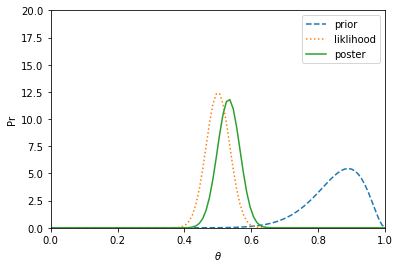

事前分布の平均 E[beta(17,3)] = 0.85
事後分布の平均 E[beta(117,103)] = 0.53


In [9]:
ex1()

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display, Latex

def ex2():
    print("""
    例2)
    プロバスケットボールのフリースローの成功率
    尤度:20回中17回成功させる選手のフリースローを観測
    事前分布：少なくても50%、最高だと90%、おおよそ75% => 最頻値＝0.75, a+b=25のベータ分布で表現
    """)
    a, b = 18.25, 6.75
    N, z = 20, 17
    x = np.linspace(0,1, 100)
    rpr = stats.beta(a,b)
    ypr = rpr.pdf(x)
    rpo = stats.beta(z+a, N-z+b)
    ypo = rpo.pdf(x)
    lik = x**z*(1-x)**(N-z)*2e4
    plt.plot(x,ypr, '--')
    plt.plot(x,lik, ':')
    plt.plot(x,ypo)
    plt.xlim([0,1])
    plt.ylim([0,10])
    plt.xlabel("$\\theta$")
    plt.ylabel("Pr")
    plt.legend(["prior","liklihood", "poster"])
    plt.show()
    print("事前分布の平均 E[beta({0},{1})] = {2:2.2f}".format(a, b, a/(a+b)) )
    print("事後分布の平均 E[beta({0},{1})] = {2:2.2f}".format(z+a,N-z+b, (z+a)/(N+a+b)))


    例2)
    プロバスケットボールのフリースローの成功率
    尤度:20回中17回成功させる選手のフリースローを観測
    事前分布：少なくても50%、最高だと90%、おおよそ75% => 最頻値＝0.75, a+b=25のベータ分布で表現
    


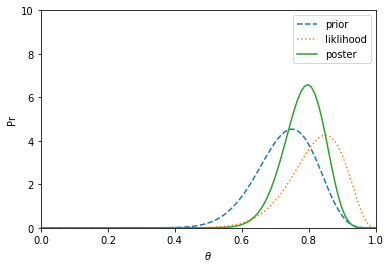

事前分布の平均 E[beta(18.25,6.75)] = 0.73
事後分布の平均 E[beta(35.25,9.75)] = 0.78


In [11]:
ex2()

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display, Latex

def ex3():
    print("""
    例3)
    新しく物質を発見するした、色は青か緑か、青色の確率 
    事前分布:情報なし
    尤度：20個中17個が青色であった
    """)
    a, b = 1, 1
    N, z = 20, 17
    x = np.linspace(0,1, 100)
    rpr = stats.beta(a,b)
    ypr = rpr.pdf(x)
    rpo = stats.beta(z+a, N-z+b)
    ypo = rpo.pdf(x)
    lik = x**z*(1-x)**(N-z)*1e5
    plt.plot(x,ypr, '--')
    plt.plot(x,lik, ':')
    plt.plot(x,ypo)
    plt.xlim([0,1])
    plt.ylim([0,20])
    plt.xlabel("$\\theta$")
    plt.ylabel("Pr")
    plt.legend(["prior","liklihood", "poster"])
    plt.show()
    print("事前分布の平均 E[beta({0},{1})] = {2:2.2f}".format(a, b, a/(a+b)) )
    print("事後分布の平均 E[beta({0},{1})] = {2:2.2f}".format(z+a,N-z+b, (z+a)/(N+a+b)))


    例3)
    新しく物質を発見するした、色は青か緑か、青色の確率 
    事前分布:情報なし
    尤度：20個中17個が青色であった
    


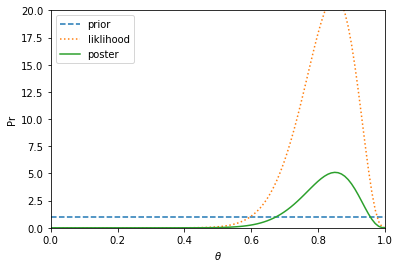

事前分布の平均 E[beta(1,1)] = 0.50
事後分布の平均 E[beta(18,4)] = 0.82


In [13]:
ex3()

## ベイズの公式

$$
p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)} \tag{5.7,p110}
$$